# Ajuste de la cantidad de parámetros de un modelo

Ya sabemos que es

¿Cuando se da el overfitting?

La cantidad de parámetros comparable con la cantidad de observaciones

Estrategia natural: Reducir la cantidad de parámetros

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper

Using TensorFlow backend.


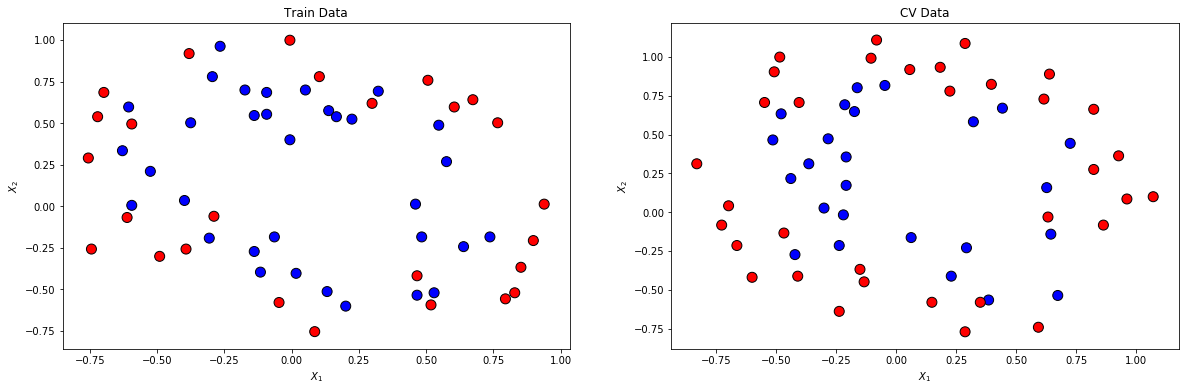

In [2]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

# Regresión logística

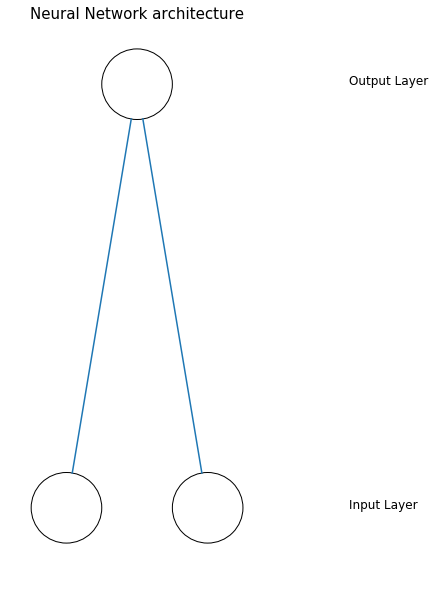

In [3]:
network = draw_nn.DrawNN( [2, 1] )
network.draw()

\begin{equation}
\large
a = x_1w_1 + x_2w_2+w_0
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}

Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


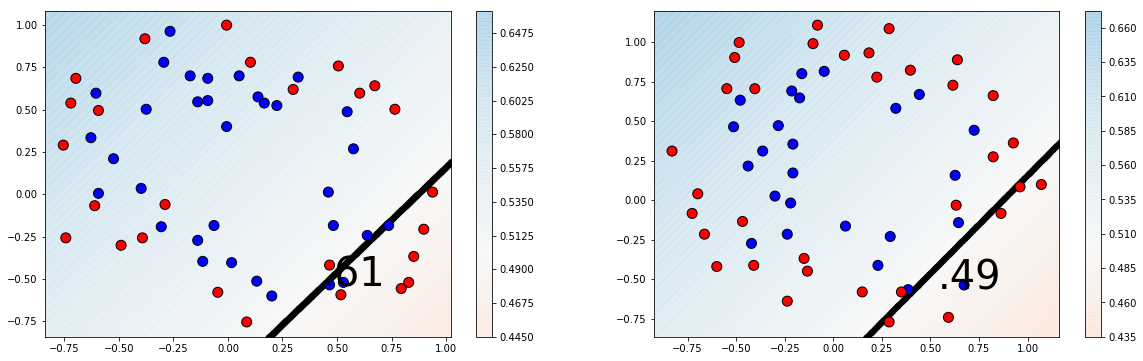

In [4]:
degree = 1
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

# Regresión logística polinomial

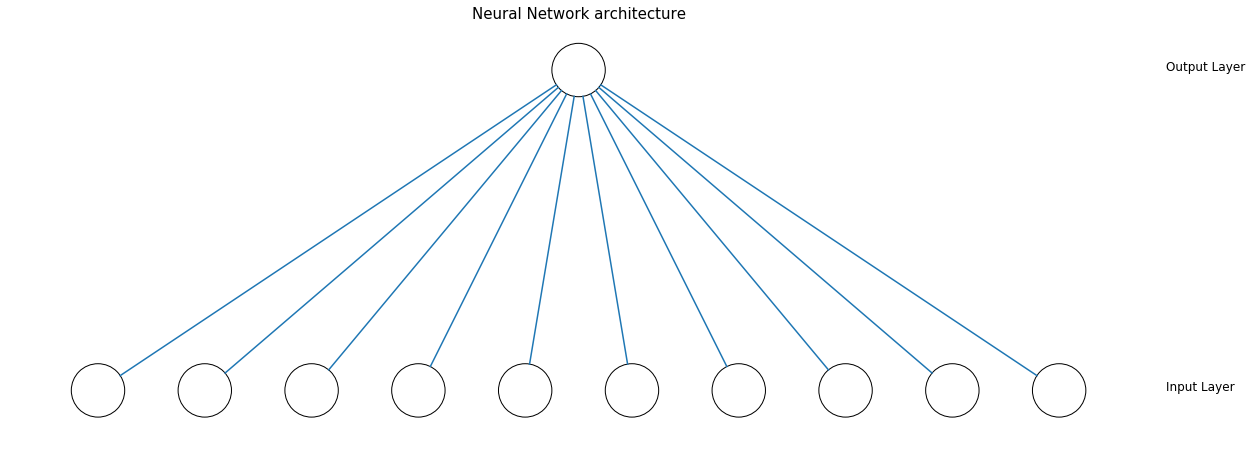

In [5]:
network = draw_nn.DrawNN( [10, 1] )
network.draw()

\begin{equation}
\large
a = w_0 + x_1w_1 + x_2w_2 + x_1x_2w_3 + w_4x_1^2 + w_5x_2^2 + ... + w_Nx_1^K
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}

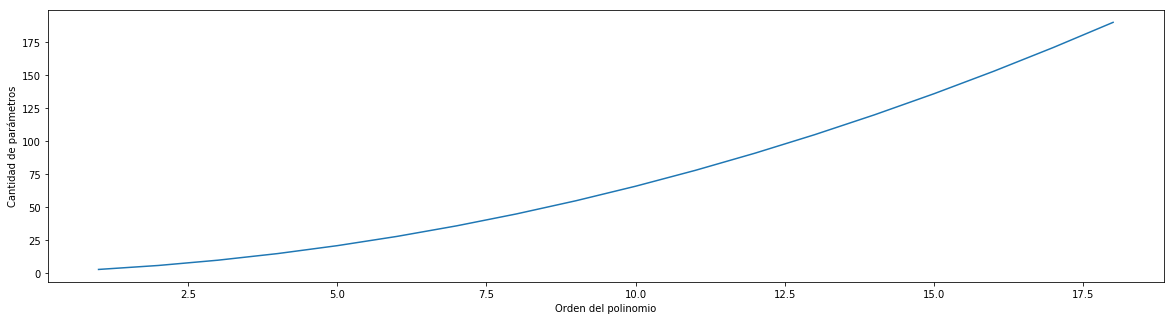

In [6]:
plt.figure(figsize=(20,5))
N = 18
pol_orders = np.linspace(1, N, N)
plt.plot(pol_orders, list(map(RHelper.params_vs_pol_order, pol_orders)))
plt.xlabel('Orden del polinomio')
plt.ylabel('Cantidad de parámetros')
plt.show()

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


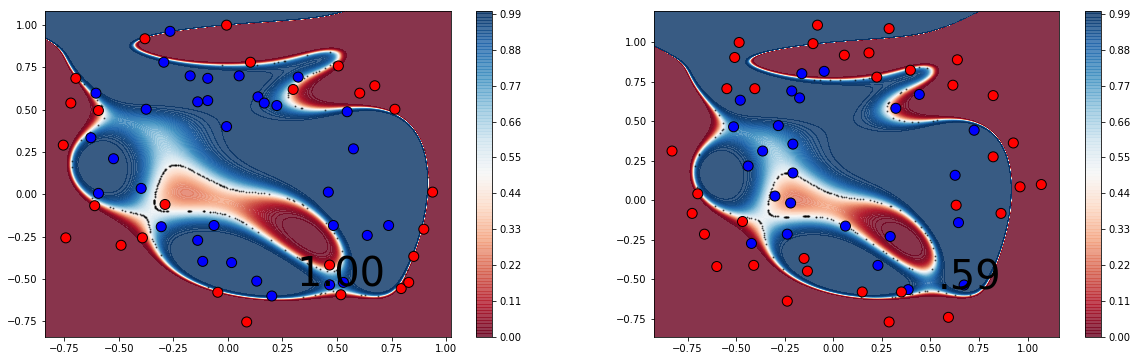

In [7]:
degree = 18
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0


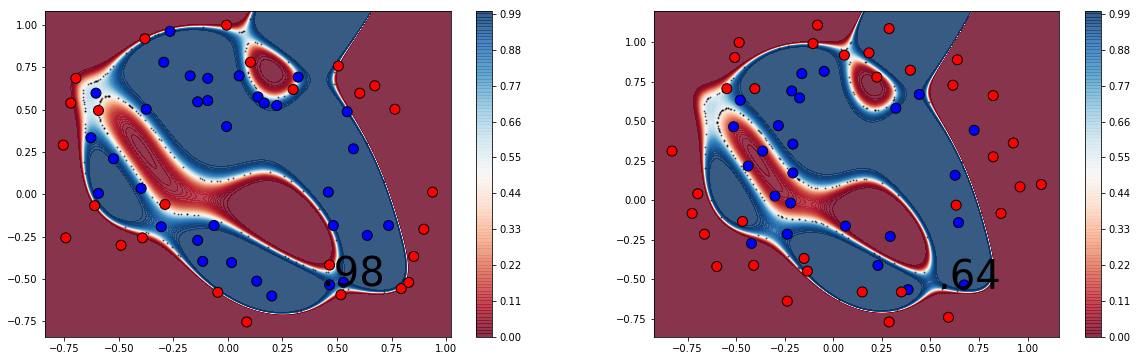

In [8]:
degree = 6
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0


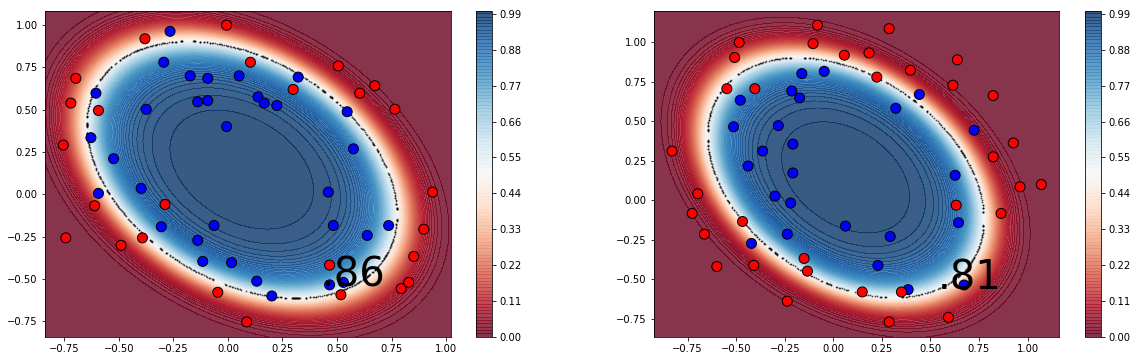

In [9]:
degree = 2
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


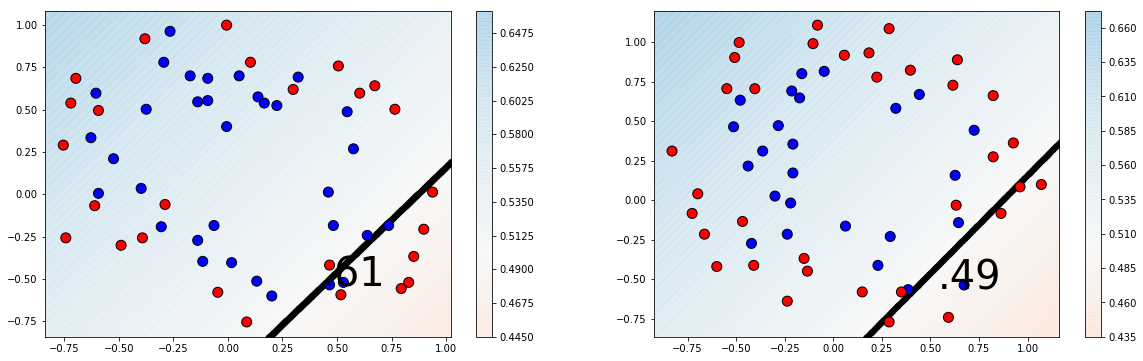

In [10]:
degree = 1
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Claramente este ultimo no es optimo (Underfitting)

# Cual es el optimo?

In [11]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

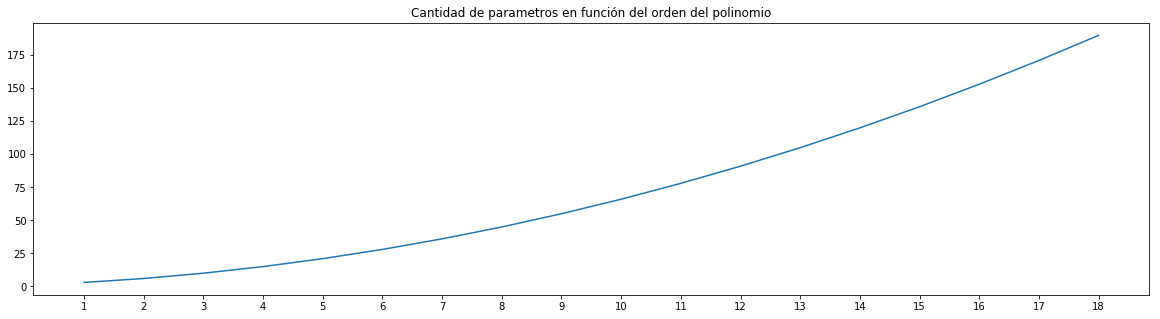

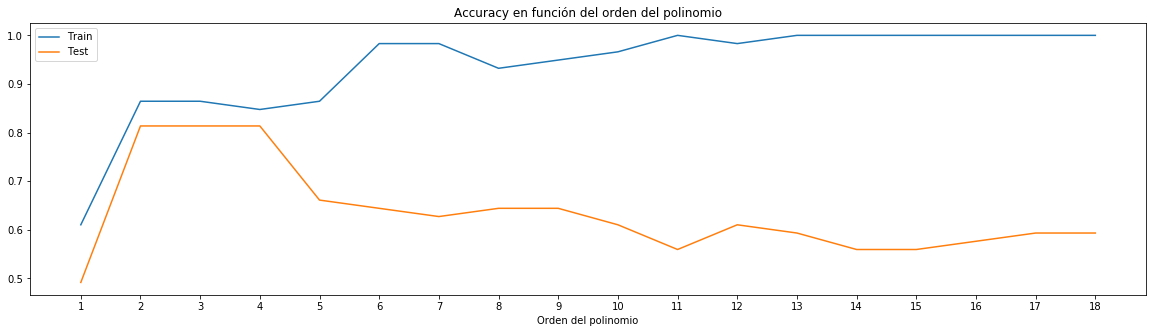

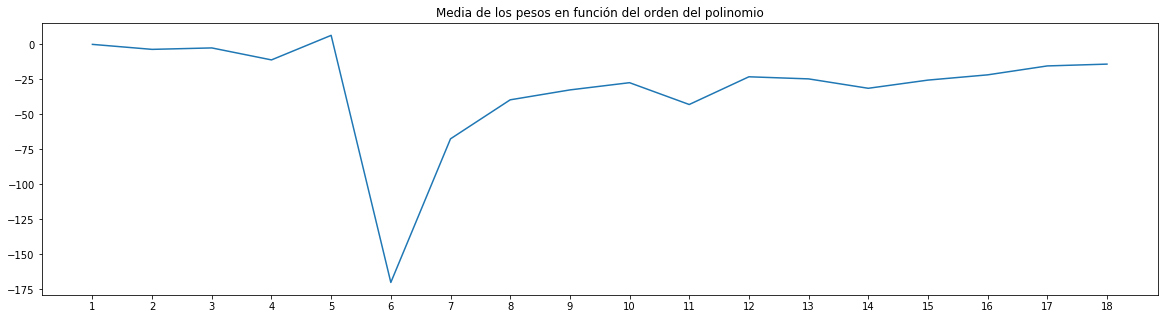

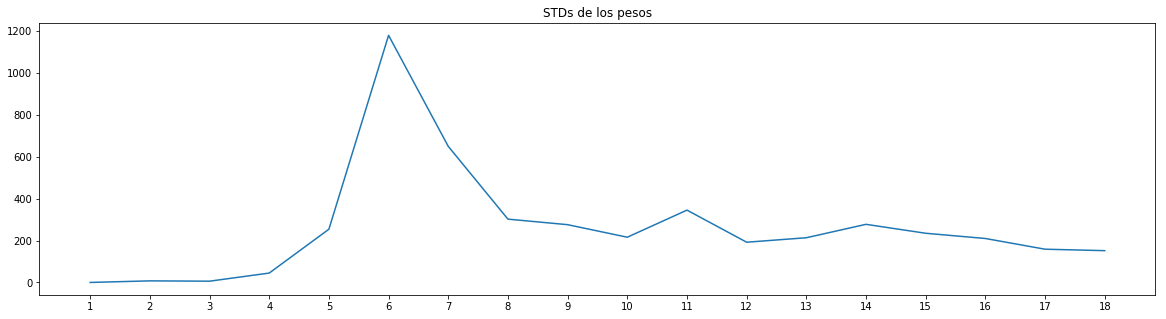

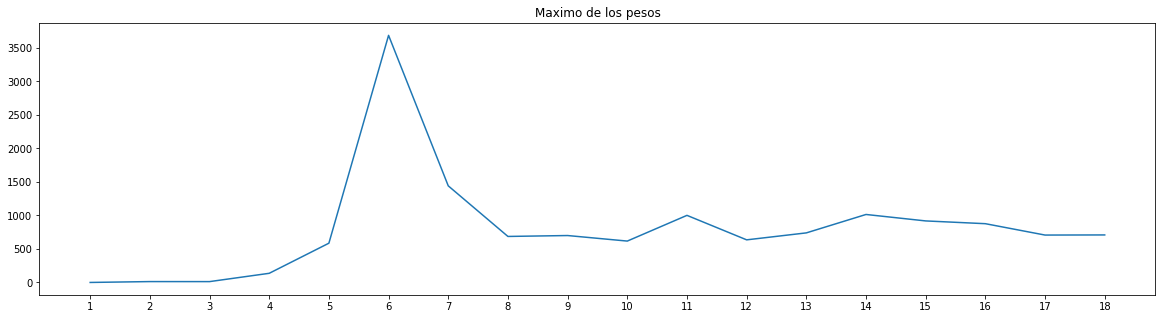

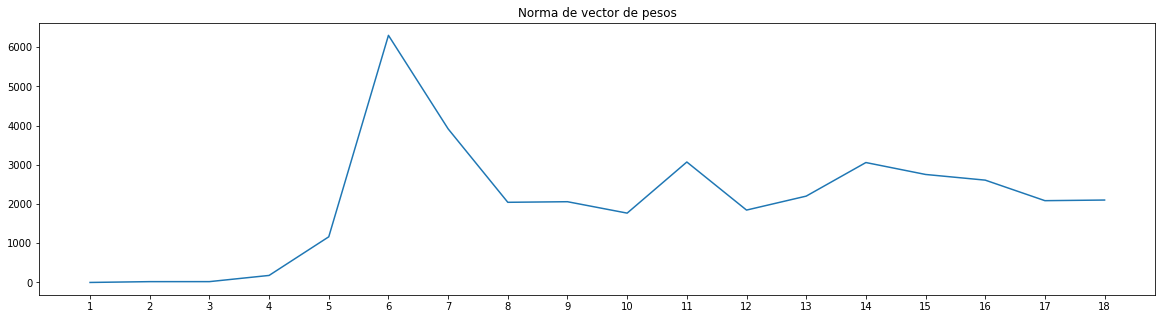

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, coefs_num)
ax.set_title("Cantidad de parametros en función del orden del polinomio")
ax.set_xticks(degrees_0)
plt.show()
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, train_acc_array_0, label="Train")
ax.plot(degrees_0, test_acc_array_0, label="Test")
ax.set_title("Accuracy en función del orden del polinomio")
ax.set_xlabel('Orden del polinomio')
ax.set_xticks(degrees_0)
ax.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_array_mean_0)
plt.title("Media de los pesos en función del orden del polinomio")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_array_std_0)
plt.title("STDs de los pesos")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_abs_max_0)
plt.title("Maximo de los pesos")
plt.xticks(degrees_0)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(degrees_0, coefs_norm)
plt.title("Norma de vector de pesos")
plt.xticks(degrees_0)
plt.show()

Preguntas:
- Cual es la cantidad de parámetros óptima?
- Que pasa con los pesos?

# Red Neuronal con capa oculta
(En vez de crecer en ancho crecemos en profundidad)

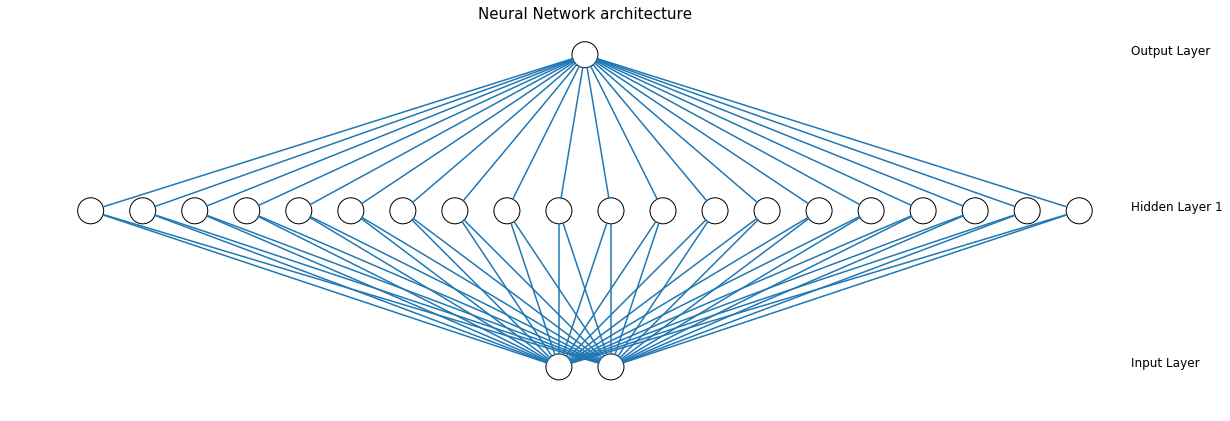

In [13]:
input_shape = 2
hidden_units = 20 # Probar con 3, 10, 20, 200
output_size = 1
network = draw_nn.DrawNN( [input_shape, hidden_units, output_size] )
network.draw()

<video controls src="./chips-mlp-20-hidden-1.mp4" width="480"/>

In [14]:
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, output_size, hidden_units=hidden_units, lr=0.1, l2_lambda=0, decay=0.0)
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
Salida (Dense)               (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


# SGD

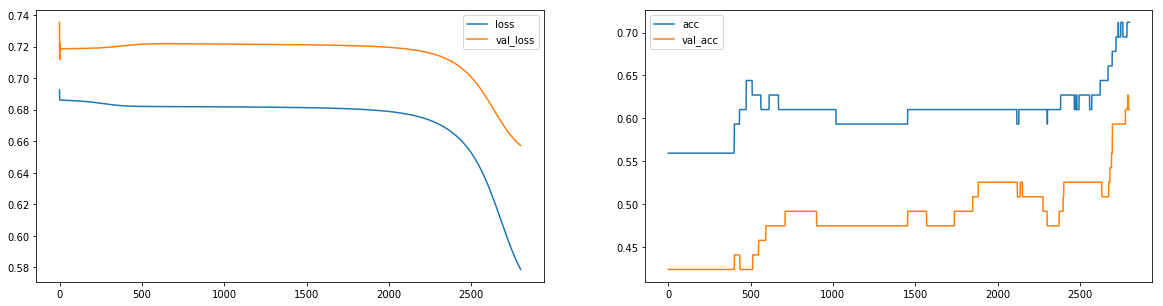

In [15]:
from fnn_helper import PlotLosses
from keras import optimizers
epochs = 3000 #adam 3000, sgd 30000
lr=1
decay=0
optim = optimizers.sgd(lr=1, decay=0, momentum=0) # cambiar a momentum 0.9 y lr a 5
batch_size = 59 # 10 y 59

# optim = optimizers.adam(lr=0.4, decay=0.0001)
# optim = optimizers.rmsprop(lr=0.01, decay=0.001)

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

¿Que diferencias se ven entre?
- ADAM y SGD. En cuanto a tiempos, curva de entrenamiento (monotona decreciente?)
- mini-batch size?
- con el decay?

In [16]:
# Para calcular norma en cada epoch
def get_weights_array(ws):
    weights_norm = []
    for weights in ws:
        weights_norm.append(np.linalg.norm(weights[0]))
    return weights_norm

59/59 [==============================] - 0s 68us/step
(37240, 1)
59/59 [==============================] - 0s 41us/step
(43888, 1)


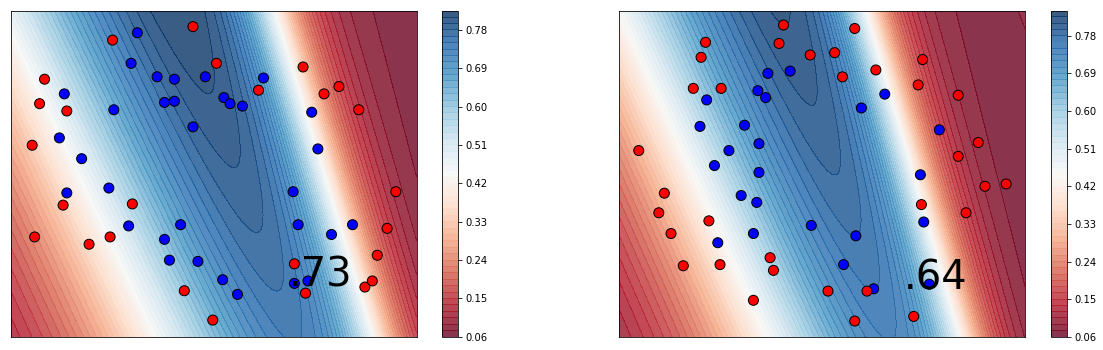

In [17]:
two_layer_model.load_weights('SGD-3000-epochs-20-hu.hdf5')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

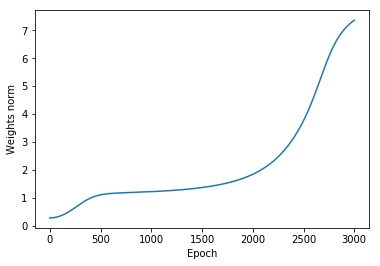

In [18]:
plt.plot(RHelper.get_weights_array(plot_losses.weights))
plt.xlabel('Epoch')
plt.ylabel('Weights norm')
plt.show()

# ADAM

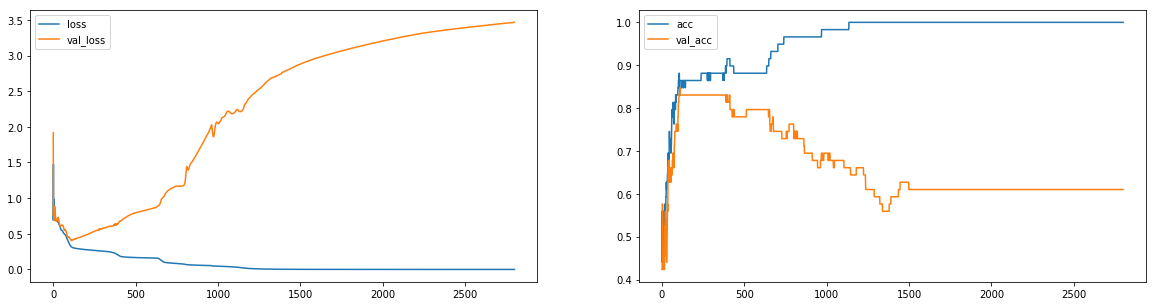

In [19]:
hidden_units = 20
optim = optimizers.sgd(lr=1, decay=0, momentum=0) # cambiar a momentum 0.9 y lr a 5
batch_size = 59 # 10 y 59

optim = optimizers.adam(lr=0.4, decay=0.0001)
# optim = optimizers.rmsprop(lr=0.01, decay=0.001)

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

59/59 [==============================] - 0s 48us/step
(37240, 1)
59/59 [==============================] - 0s 36us/step
(43888, 1)


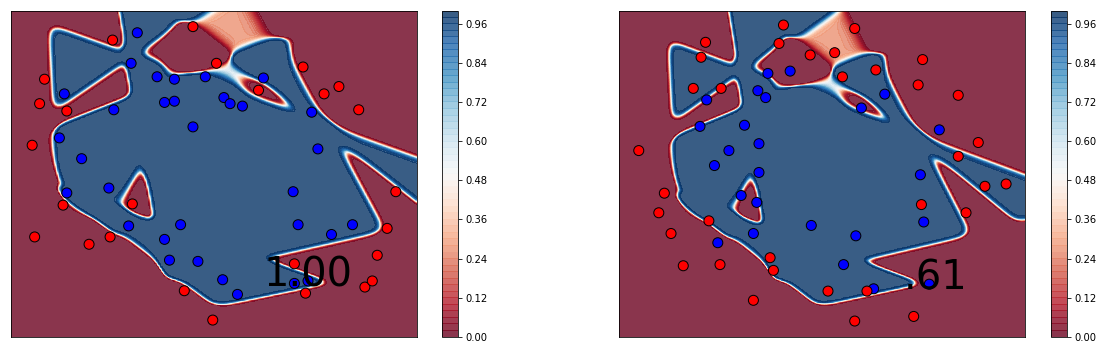

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

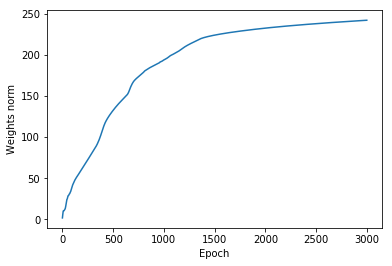

In [21]:
plt.plot(RHelper.get_weights_array(plot_losses.weights))
plt.xlabel('Epoch')
plt.ylabel('Weights norm')
plt.show()

# Probar con distinta cantidad de unidades ocultas y encontrar la optima

Cosas interesantes:
- Probar correr dos veces con los mismos parametros y observar si los resultados cambian

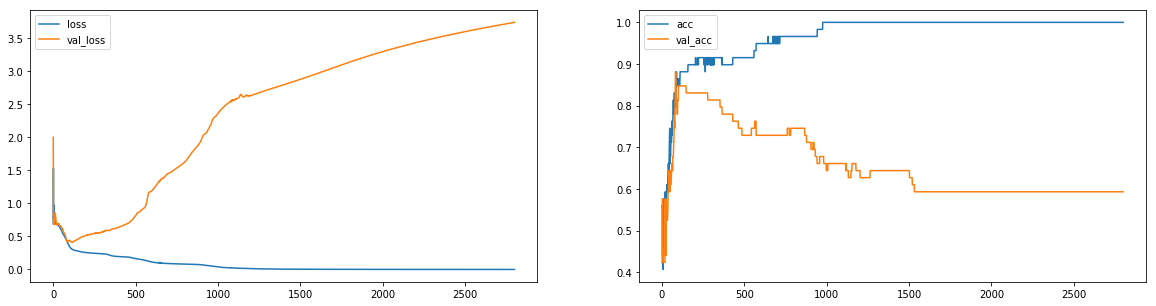

In [22]:
hidden_units = 15
optim = optimizers.sgd(lr=1, decay=0, momentum=0) # cambiar a momentum 0.9 y lr a 5
batch_size = 59 # 10 y 59

optim = optimizers.adam(lr=0.4, decay=0.0001)
# optim = optimizers.rmsprop(lr=0.01, decay=0.001)

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

59/59 [==============================] - 0s 55us/step
(37240, 1)
59/59 [==============================] - 0s 44us/step
(43888, 1)


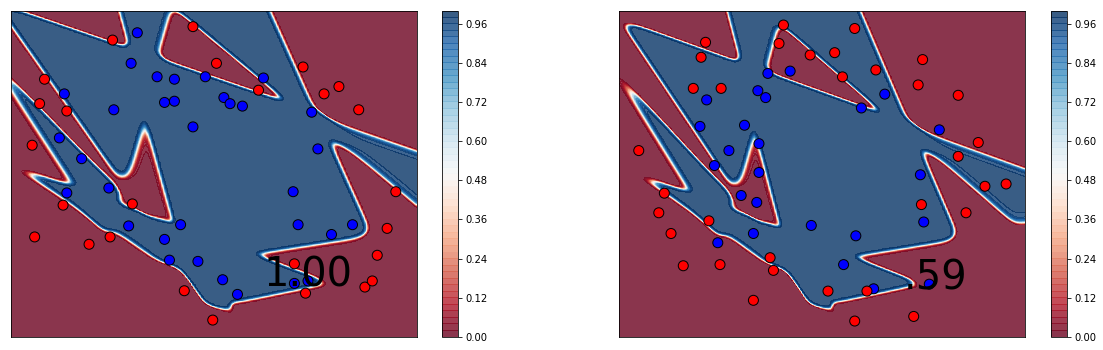

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()